## 1- Objetivo
 
 - Encontrar o melhor modelo para a previsão de faturamento.
 

 - Importando os dados preprocessados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import date

In [2]:
url = 'https://raw.githubusercontent.com/robertferro/studio-estetica/main/dados_modelagem.csv'

In [3]:
dados = pd.read_csv(url, sep = ',')

In [4]:
dados.head()

,Unnamed: 0,data_atendimento,design_de_sobrancelhas,design_coloracao,design_coloracao_buco,buco,brown_lamination,micropigmentacao,extensao_de_cilios,lash_lifting,limpeza_de_pele,microagulhamento,peeling_quimico,massagem_relaxante,pacote_massagem_5,drenagem_linfatica,striort,qtde_clientes,faturamento
0,1,2018-12-23,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,270.0
1,2,2018-12-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,2018-12-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,2018-12-26,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,560.0
4,5,2018-12-27,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,90.0


## 2. Manipulação de dados.


 - Criando novas colunas referentes a data.

In [5]:
dados = dados.drop('Unnamed: 0' , axis = 1)

In [6]:
# reorganizando os dados referentes a data 

def date_to_weekday(date):
    weekday_dict = {0:'segunda', 1:'terca', 2: 'quarta', 3: 'quinta', 4: 'sexta', 5: 'sabado', 6: 'domingo'}
    date_time_obj = datetime.datetime.strptime(date, '%Y-%m-%d')
    return weekday_dict[date_time_obj.weekday()]

date = dados['data_atendimento'].str.split("-", n = 3, expand = True)
dados['ano'] = date[0].astype('int32')
dados['dia'] = date[2].astype('int32')
dados['mes'] = date[1].astype('int32')
dados['dia_da_semana'] = dados['data_atendimento'].apply(date_to_weekday)

In [7]:
dados.head()

,data_atendimento,design_de_sobrancelhas,design_coloracao,design_coloracao_buco,buco,brown_lamination,micropigmentacao,extensao_de_cilios,lash_lifting,limpeza_de_pele,...,massagem_relaxante,pacote_massagem_5,drenagem_linfatica,striort,qtde_clientes,faturamento,ano,dia,mes,dia_da_semana
0,2018-12-23,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,7.0,270.0,2018,23,12,domingo
1,2018-12-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2018,24,12,segunda
2,2018-12-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2018,25,12,terca
3,2018-12-26,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,560.0,2018,26,12,quarta
4,2018-12-27,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,2.0,90.0,2018,27,12,quinta


In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   data_atendimento        740 non-null    object 
 1   design_de_sobrancelhas  740 non-null    float64
 2   design_coloracao        740 non-null    float64
 3   design_coloracao_buco   740 non-null    float64
 4   buco                    740 non-null    float64
 5   brown_lamination        740 non-null    float64
 6   micropigmentacao        740 non-null    float64
 7   extensao_de_cilios      740 non-null    float64
 8   lash_lifting            740 non-null    float64
 9   limpeza_de_pele         740 non-null    float64
 10  microagulhamento        740 non-null    float64
 11  peeling_quimico         740 non-null    float64
 12  massagem_relaxante      740 non-null    float64
 13  pacote_massagem_5       740 non-null    float64
 14  drenagem_linfatica      740 non-null    fl

 - Reordenando as colunas

In [9]:
dados.columns

Index(['data_atendimento', 'design_de_sobrancelhas', 'design_coloracao',
       'design_coloracao_buco', 'buco', 'brown_lamination', 'micropigmentacao',
       'extensao_de_cilios', 'lash_lifting', 'limpeza_de_pele',
       'microagulhamento', 'peeling_quimico', 'massagem_relaxante',
       'pacote_massagem_5', 'drenagem_linfatica', 'striort', 'qtde_clientes',
       'faturamento', 'ano', 'dia', 'mes', 'dia_da_semana'],
      dtype='object')

In [10]:
dados = dados[['data_atendimento', 'design_de_sobrancelhas', 'design_coloracao',
       'design_coloracao_buco', 'buco', 'brown_lamination', 'micropigmentacao',
       'extensao_de_cilios', 'lash_lifting', 'limpeza_de_pele',
       'microagulhamento', 'peeling_quimico', 'massagem_relaxante',
       'pacote_massagem_5', 'drenagem_linfatica', 'striort', 'qtde_clientes', 'dia', 'mes','ano', 'dia_da_semana',
       'faturamento']]

In [11]:
dados.head()

,data_atendimento,design_de_sobrancelhas,design_coloracao,design_coloracao_buco,buco,brown_lamination,micropigmentacao,extensao_de_cilios,lash_lifting,limpeza_de_pele,...,massagem_relaxante,pacote_massagem_5,drenagem_linfatica,striort,qtde_clientes,dia,mes,ano,dia_da_semana,faturamento
0,2018-12-23,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,7.0,23,12,2018,domingo,270.0
1,2018-12-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,24,12,2018,segunda,0.0
2,2018-12-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,25,12,2018,terca,0.0
3,2018-12-26,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,26,12,2018,quarta,560.0
4,2018-12-27,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,2.0,27,12,2018,quinta,90.0


 ## 4. Machine learning

 - Definindo as amostras de treino e teste

In [12]:
dados.columns

Index(['data_atendimento', 'design_de_sobrancelhas', 'design_coloracao',
       'design_coloracao_buco', 'buco', 'brown_lamination', 'micropigmentacao',
       'extensao_de_cilios', 'lash_lifting', 'limpeza_de_pele',
       'microagulhamento', 'peeling_quimico', 'massagem_relaxante',
       'pacote_massagem_5', 'drenagem_linfatica', 'striort', 'qtde_clientes',
       'dia', 'mes', 'ano', 'dia_da_semana', 'faturamento'],
      dtype='object')

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
enconder = LabelEncoder()

In [15]:
dados['dia_da_semana'] = enconder.fit_transform(dados['dia_da_semana'])
dados['data_atendimento'] = enconder.fit_transform(dados['data_atendimento'])

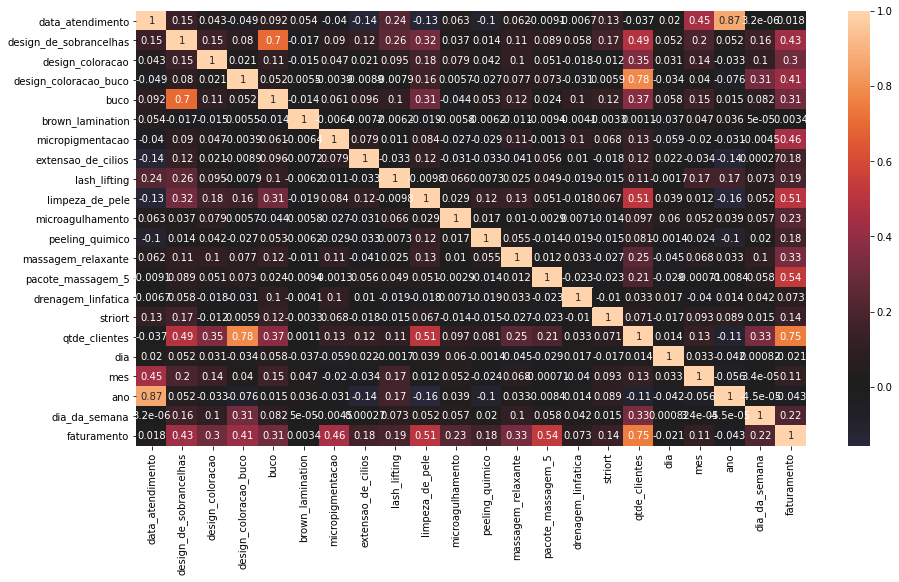

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(dados.corr(),annot = True, center = 0)

In [17]:
X = dados[['qtde_clientes','mes','dia_da_semana']]
Y = dados['faturamento']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_treino,X_teste,Y_treino,Y_teste = train_test_split(X,Y,test_size=0.25,random_state=0)

 - Modelo "Baseline" (Ponto de partida)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr = LinearRegression()
lr.fit(X_treino, Y_treino)
lr.score(X_teste, Y_teste)

0.4291976486672717

 - Exemplo de normalização dos dados (outliers)

In [22]:
# train['design_coloracao_buco']=train['design_coloracao_buco'].apply(np.log1p)
# train['faturamento']=train['faturamento'].apply(np.log1p)

In [23]:
# test['design_coloracao_buco']=test['design_coloracao_buco'].apply(np.log1p)
# test['faturamento']=test['faturamento'].apply(np.log1p)

 - Machine learning

In [24]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X_treino,Y_treino)

KNeighborsRegressor()

In [25]:
y_pred = neigh.predict(X_teste)

In [26]:
# Root Mean Squared Error
np.sqrt(np.mean((y_pred-Y_teste.values)**2))

113.34734656344176

In [27]:
# Mean Squared Error
np.mean((y_pred-Y_teste.values)**2)

12847.620972972973

In [28]:
# Mean Absolute Error
np.mean(np.abs(y_pred-Y_teste.values))

58.8572972972973

In [29]:
# R2 Score
from sklearn.metrics import r2_score
r2_score(Y_teste, y_pred)

0.44500079859028063

 - Triagem com outros modelos

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor


regressor_list = [
                  DecisionTreeRegressor(),
                  RandomForestRegressor(),
                  MLPRegressor(),
                  XGBRegressor(),
           
                  ]

for reg in regressor_list:
  print('Treinando', reg.__class__.__name__)
  reg.fit(X_treino, Y_treino)
  train_score = reg.score(X_treino, Y_treino)
  test_score = reg.score(X_teste, Y_teste)
  print('Train score', train_score)
  print('Test score', test_score)
  print('='*80)

Treinando DecisionTreeRegressor
Train score 0.9109198134379974
Test score -0.07620531851758527
Treinando RandomForestRegressor
Train score 0.8803442693913168
Test score 0.33144623547380037
Treinando MLPRegressor


C:\Users\Biena\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train score 0.5165110127257957
Test score 0.5082106026869702
Treinando XGBRegressor
Train score 0.9097907563046979
Test score 0.09268432819126793


- Repetindo com validação cruzada.

In [31]:
# repetindo processo com validação cruzada
import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score


regressor_list = [
                  DecisionTreeRegressor(),
                  RandomForestRegressor(),
                  MLPRegressor(),
                  XGBRegressor(),
                  ]

for reg in regressor_list:
  print('Treinando', reg.__class__.__name__)
  reg.fit(X_treino, Y_treino)
  train_score = reg.score(X_treino, Y_treino)
  val_score = cross_val_score(reg, X_treino, Y_treino, cv=5)
  test_score = reg.score(X_teste, Y_teste)
  print('Train score', train_score)
  print('Validation score', val_score)
  print('Test score', test_score)
  print('='*80)

Treinando DecisionTreeRegressor
Train score 0.9109198134379974
Validation score [0.44675815 0.51275605 0.12484773 0.31291249 0.40441565]
Test score -0.07235247067295236
Treinando RandomForestRegressor
Train score 0.8778321766260391
Validation score [0.69955902 0.65891945 0.49473674 0.54451735 0.50038121]
Test score 0.3443108916200879
Treinando MLPRegressor
Train score 0.5098663494398862
Validation score [0.49843328 0.53348956 0.38880817 0.53968655 0.48383904]
Test score 0.4980212725962142
Treinando XGBRegressor
Train score 0.9097907563046979
Validation score [0.62884104 0.53846762 0.38897375 0.42162439 0.41608994]
Test score 0.09268432819126793


## XGBRegressor 

In [32]:
#  Todo: calibração do modelo
from sklearn.model_selection import GridSearchCV
parameters=[{'learning_rate':[0.1,0.2,0.3,0.4,0.5],
             'max_depth':np.arange(0,10),
             'n_estimators':np.arange(0,100,10),
              }]
            
xgb = XGBRegressor(n_estimators=100, max_depth=1)
gs = GridSearchCV(xgb,parameters,scoring='r2',n_jobs=-1,cv=5)
gs.fit(X_treino, Y_treino)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=1, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_paramet

In [33]:
gs.best_params_

{'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 70}

In [55]:
xgb = XGBRegressor(learning_rate=0.2, max_depth=2, n_estimators=70)

In [56]:
xgb.fit(X_treino, Y_treino)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=70, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [57]:
train_score = xgb.score(X_treino, Y_treino)
val_score = cross_val_score(xgb, X_treino, Y_treino, cv=3)
test_score = xgb.score(X_teste, Y_teste)
print('Train score', train_score)
print('Validation score', val_score)
print('Test score', test_score)

Train score 0.7214123776402986
Validation score [0.67099944 0.62505916 0.62539331]
Test score 0.5102468595037093


In [58]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

 - Redefinindo y_pred e  reacalculando o erro

In [59]:
y_pred = xgb.predict(X_teste)

In [60]:
MAE  = mean_absolute_error(Y_teste,y_pred)
MSE  = mean_squared_error(Y_teste,y_pred)
RMSE = np.sqrt(mean_squared_error(Y_teste,y_pred))
R2 = r2_score(Y_teste, y_pred)

In [61]:
print('MAE = {:0.4f}'.format(MAE))
print('MSE = {:0.4f}'.format(MSE))
print('RMSE = {:0.4f}'.format(RMSE))
print('R2 = {:0.4f}'.format(R2))

MAE = 65.3640
MSE = 11337.2464
RMSE = 106.4765
R2 = 0.5102


## RandonForestRegressor

In [62]:
from sklearn.ensemble import RandomForestRegressor

 - GridSearch

In [63]:
from sklearn.model_selection import GridSearchCV
parameters=[{'criterion' : ['mae','mse'],
             'max_depth':[1,2,3,4,5,6,7,8,9,10],
             'n_estimators':np.arange(10,120,10),
            }]
            
reg = RandomForestRegressor(n_estimators=100, max_depth=2)
reg = GridSearchCV(reg,parameters,scoring='r2',n_jobs=-1,cv=5 , refit=True)
reg.fit(X_treino, Y_treino)

GridSearchCV(cv=5, estimator=RandomForestRegressor(max_depth=2), n_jobs=-1,
             param_grid=[{'criterion': ['mae', 'mse'],
                          'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110])}],
             scoring='r2')

In [64]:
reg.best_params_

{'criterion': 'mae', 'max_depth': 6, 'n_estimators': 80}

In [65]:
reg = RandomForestRegressor(criterion = 'mae', max_depth = 6, n_estimators = 80)

In [66]:
reg.fit(X_treino, Y_treino)

RandomForestRegressor(criterion='mae', max_depth=6, n_estimators=80)

In [67]:
train_score = reg.score(X_treino, Y_treino)
val_score = cross_val_score(reg, X_treino, Y_treino, cv=5)
test_score = reg.score(X_teste, Y_teste)
print('Train score', train_score)
print('Validation score', val_score)
print('Test score', test_score)

Train score 0.7600691141402615
Validation score [0.70546796 0.7001557  0.55158992 0.62748134 0.57260054]
Test score 0.5444142223935677


In [68]:
y_pred = reg.predict(X_teste)

In [69]:
MAE  = mean_absolute_error(Y_teste,y_pred)
MSE  = mean_squared_error(Y_teste,y_pred)
RMSE = np.sqrt(mean_squared_error(Y_teste,y_pred))
R2 = r2_score(Y_teste, y_pred)

In [70]:
print('MAE = {:0.4f}'.format(MAE))
print('MSE = {:0.4f}'.format(MSE))
print('RMSE = {:0.4f}'.format(RMSE))
print('R2 = {:0.4f}'.format(R2))

MAE = 54.8369
MSE = 10546.3096
RMSE = 102.6952
R2 = 0.5444


In [ ]:
# import pickle
# # now you can save it to a file
# with open('xgboost_regression.pkl', 'wb') as f:
#     pickle.dump(reg, f)
